# Image Loading & Preprocessing

In [20]:
from pathlib import Path
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Game Screenshots

In [30]:
dataset_path = Path('../data/image/screenshots')
train_path = dataset_path/'train'
test_path = dataset_path/'test'

In [31]:
train_filenames = list(train_path.glob('*.jpg'))
test_filanames = list(test_path.glob('*.jpg'))

train_filenames = sorted(train_filenames, key=lambda x: int(os.path.splitext(x.name)[0]))
test_filenames = sorted(test_filanames, key=lambda x: int(os.path.splitext(x.name)[0]))

train_filenames = [str(x) for x in train_filenames]
test_filenames = [str(x) for x in test_filenames]


In [33]:
def load_image(path):
    img = Image.open(path)
    return img

In [34]:
def preprocess_image(loaded_img):
    img = loaded_img.resize((256, 256))
    img = img.convert('RGB')
    img = np.array(img).astype(np.float32)
    #if img.max() > 1:
    #    img = (img / 127.5) - 1
    if img.max() > 1:
        img = img/255
    return img

In [35]:
print(train_filenames[0])

..\data\image\screenshots\train\0.jpg


In [36]:
train = np.array([preprocess_image(load_image(x)) for x in train_filenames])
test = np.array([preprocess_image(load_image(x)) for x in test_filenames])


In [37]:
print(train.shape)
print(test.shape)

(1600, 256, 256, 3)
(400, 256, 256, 3)


In [38]:
# save as pickle
np.save(Path('../data/screenshots_train.npy'), train)
np.save(Path('../data/screenshots_test.npy'), test)

## Posters Images

In [9]:
import datasets

dataset = datasets.load_dataset("cyberagent/crello")
dataset = dataset.filter(lambda example: example['format'] == 6)

In [13]:
unique_formats = {}  # Dictionary to hold the first example of each format

# Assuming you're interested in the 'train' split, adjust as necessary
for example in dataset['train']:
    format_key = example['format']
    if format_key not in unique_formats:
        unique_formats[format_key] = example
    if len(unique_formats) == 50:  # Optional: stop if all formats are found
        break

# Now unique_formats dictionary holds one example for each format
from IPython.display import display

# Display the first image of each format
for format_key, example in unique_formats.items():
    image_file = example['image'][0]  # This is the image file object
    print(f"Format: {format_key}")  # Display the format label
    display(image_file)  # Display the image file

KeyboardInterrupt: 

In [14]:
marketing_set = dataset["train"]['image'][:2000]

marketing_images = []
for example in marketing_set:
    img = example[0]
    img = preprocess_image(img)
    marketing_images.append(img)

marketing_images = np.array(marketing_images)


In [39]:
print(marketing_images.shape)

(766, 256, 256, 3)


In [16]:
np.save(Path('../data/marketing_images.npy'), marketing_images)

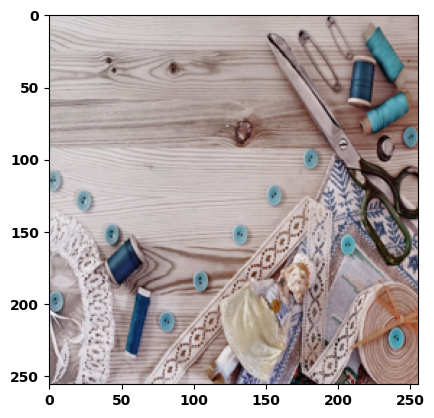

In [15]:

plt.figure()
plt.imshow(marketing_images[494])

